# **Importing all libraries**





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# **printing Dataset**

In [3]:
df1 = pd.read_csv("MDS-UPDRS_Part_III-Group-A.csv")
df2 = pd.read_csv("MDS-UPDRS_Part_III-Group-B.csv")
df = pd.concat([df1, df2], axis=0)

In [4]:
df.shape

(23929, 63)

In [5]:
df.describe()

,Unnamed: 0,PATNO,PDTRTMNT,HRPOSTMED,HRDBSON,HRDBSOFF,PDMEDYN,DBSYN,ONOFFORDER,OFFEXAM,...,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,NP3TOT,DYSKPRES,DYSKIRAT,NHY
count,23929.000000,23929.000000,21635.000000,9915.000000,286.000000,100.000000,20588.000000,22881.000000,2476.000000,1692.000000,...,23131.000000,23131.000000,23131.000000,23131.000000,23129.000000,23128.000000,20655.000000,23122.000000,5454.000000,23122.000000
mean,11986.122696,42839.330812,0.505662,31.998958,6.328266,0.676342,0.527492,0.036449,1.296042,0.591017,...,0.693096,0.621504,0.840128,0.853184,0.394267,1.117304,17.478092,0.059597,0.022186,2.363896
std,6891.505483,50574.208877,0.499979,2038.834751,5.561252,1.055085,0.499256,0.187410,0.456602,0.491792,...,5.268224,5.457121,8.526181,8.677553,5.895777,5.896994,14.674612,0.236744,0.147300,10.628040
min,0.000000,3000.000000,0.000000,-8760.500000,-10.766700,-0.083300,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6020.000000,3564.000000,0.000000,1.333300,1.350000,0.066700,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,11992.000000,40609.000000,1.000000,3.000000,4.125000,0.250000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,2.000000
75%,17937.000000,58671.000000,1.000000,12.000000,11.350000,1.166700,1.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,2.000000
max,23930.000000,293714.000000,1.000000,175321.383300,16.000000,8.666700,1.000000,1.000000,2.000000,1.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,100.000000,1.000000,1.000000,101.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23929 entries, 0 to 11964
Data columns (total 63 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   23929 non-null  int64  
 1   REC_ID       23929 non-null  object 
 2   PATNO        23929 non-null  int64  
 3   EVENT_ID     23929 non-null  object 
 4   PAG_NAME     23929 non-null  object 
 5   INFODT       23929 non-null  object 
 6   PDTRTMNT     21635 non-null  float64
 7   PDSTATE      10986 non-null  object 
 8   HRPOSTMED    9915 non-null   float64
 9   HRDBSON      286 non-null    float64
 10  HRDBSOFF     100 non-null    float64
 11  PDMEDYN      20588 non-null  float64
 12  DBSYN        22881 non-null  float64
 13  ONOFFORDER   2476 non-null   float64
 14  OFFEXAM      1692 non-null   float64
 15  OFFNORSN     687 non-null    float64
 16  DBSOFFTM     113 non-null    object 
 17  ONEXAM       1764 non-null   float64
 18  ONNORSN      106 non-null    float64
 19  DBSO

# **Finding missing values**

In [7]:
null_values = df.isna().sum()/len(df)*100
null_values.sort_values(ascending = False)

HRDBSOFF       99.582097
ONNORSN        99.557023
DBSOFFTM       99.527770
HRDBSON        98.804798
DBSONTM        98.754649
                 ...    
LAST_UPDATE     0.000000
PAG_NAME        0.000000
INFODT          0.000000
ORIG_ENTRY      0.000000
Unnamed: 0      0.000000
Length: 63, dtype: float64

In [8]:
df["PATNO"].value_counts()

3400      44
3407      40
4091      40
3422      39
3954      38
          ..
143551     1
239820     1
200637     1
195088     1
4060       1
Name: PATNO, Length: 2861, dtype: int64

In [9]:
df["NHY"].value_counts()

2.0      10404
0.0       7861
1.0       3394
3.0        967
101.0      263
4.0        173
5.0         60
Name: NHY, dtype: int64

# **Handling Missing values**

**Drop column with high percentage of missing value**

In [10]:
threshold = 70  # Set the threshold for missing values percentage

# Calculate the percentage of missing values for each column
null_values = df.isna().mean() * 100

# Identify columns with missing values greater than the threshold
columns_to_drop = null_values[null_values > threshold].index

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df)

       Unnamed: 0      REC_ID   PATNO EVENT_ID    PAG_NAME   INFODT  PDTRTMNT  \
0           17595   671077401   57869      V04     NUPDRS3  12/2017       1.0   
1           21551  IANT214603  111429       BL  NUPDRDOSE3  11/2022       0.0   
2           23302  IANT310558  182340       BL  NUPDRDOSE3  02/2023       0.0   
3           20789  IAON164829  101018      V02  NUPDRDOSE3  11/2021       1.0   
4           16024  IANT163527   52587      V12  NUPDRDOSE3  04/2021       0.0   
...           ...         ...     ...      ...         ...      ...       ...   
11960       17893  IAOF164017   58510      V08  NUPDRDOSE3  03/2021       1.0   
11961         720   532644601    3069      V10     NUPDRS3  08/2015       NaN   
11962       22646  IANT165575  153027       BL  NUPDRDOSE3  08/2022       0.0   
11963       18553   478056701   60043      V02     NUPDRS3  11/2014       0.0   
11964        3195  IANT162050    3318      R16  NUPDRDOSE3  02/2022       0.0   

      PDSTATE  HRPOSTMED  P

In [11]:
null_values = df.isna().sum()/len(df)*100
null_values.sort_values(ascending = False)


HRPOSTMED      58.564921
PDMEDTM        58.088512
PDMEDDT        58.050901
PDSTATE        54.089180
EXAMTM         18.471311
PDMEDYN        13.962138
NP3TOT         13.682143
PDTRTMNT        9.586694
DBSYN           4.379623
NP3PSTBL        3.468595
NP3TTAPL        3.451878
NP3TTAPR        3.451878
NP3FRZGT        3.385014
NHY             3.372477
DYSKPRES        3.372477
NP3HMOVL        3.368298
NP3FTAPL        3.359940
NP3RIGLL        3.351582
EXAMDT          3.351582
NP3RTCON        3.347403
NP3PRSPL        3.347403
NP3RIGRL        3.347403
NP3RISNG        3.347403
NP3PTRML        3.347403
NP3RIGN         3.343224
NP3RIGLU        3.343224
NP3RTALJ        3.343224
NP3LGAGL        3.343224
NP3GAIT         3.343224
NP3RIGRU        3.343224
NP3POSTR        3.339045
NP3BRADY        3.339045
NP3PTRMR        3.339045
NP3KTRMR        3.339045
NP3PRSPR        3.334866
NP3FTAPR        3.334866
NP3HMOVR        3.334866
NP3LGAGR        3.334866
NP3KTRML        3.334866
NP3RTARU        3.334866


In [12]:
# Assuming you want to drop these columns
columns_to_drop = ["PDMEDTM","PDMEDDT","EXAMTM","EXAMDT","ORIG_ENTRY","EVENT_ID","INFODT","LAST_UPDATE","Unnamed: 0","REC_ID"]

# Drop the specified columns from the original DataFrame
df = df.drop(columns=columns_to_drop, axis=1)


# ***Dropping rows having null values***

In [13]:
# Identify numerical columns with missing values
numerical_columns_with_missing = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').isnull().any()]

df=df.dropna()

# Now, 'df' contains numerical columns with missing values replaced by the median
print(df)

        PATNO    PAG_NAME  PDTRTMNT PDSTATE  HRPOSTMED  PDMEDYN  DBSYN  \
0       57869     NUPDRS3       1.0     OFF    14.5000      1.0    0.0   
3      101018  NUPDRDOSE3       1.0      ON     3.0833      1.0    0.0   
9        3282    NUPDRS3A       1.0      ON     1.5167      1.0    0.0   
10       3960  NUPDRDOSE3       1.0      ON     1.3167      1.0    0.0   
14       3482     NUPDRS3       1.0     OFF    16.5833      1.0    0.0   
...       ...         ...       ...     ...        ...      ...    ...   
11948    3822  NUPDRDOSE3       1.0      ON     1.0000      1.0    0.0   
11949    3365     NUPDRS3       1.0      ON     1.1667      1.0    0.0   
11951   42411    NUPDRS3A       1.0      ON     0.8333      1.0    0.0   
11956  143192  NUPDRDOSE3       1.0      ON     0.4667      1.0    0.0   
11959    3203     NUPDRS3       1.0      ON     1.7500      1.0    0.0   

       NP3SPCH  NP3FACXP  NP3RIGN  ...  NP3KTRML  NP3RTARU  NP3RTALU  \
0          1.0       2.0      3.0  ... 

**Replace missing values with median**

In [14]:
# # Identify numerical columns with missing values
# numerical_columns_with_missing = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').isnull().any()]

# # Replace missing values with median for each numerical column
# for column in numerical_columns_with_missing:
#     median_value = df[column].median()
#     df[column].fillna(median_value, inplace=True)

# # Now, 'df' contains numerical columns with missing values replaced by the median
# print(df)

**Replace missing values with mode**

In [15]:
# # Identify Categorical columns with missing values
# numerical_columns_with_missing = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()]

# # Replace missing values with mode for each categorical column
# for column in numerical_columns_with_missing:
#     mode_value = df[column].mode()[0]
#     df[column].fillna(mode_value, inplace=True)

# # Now, 'df' contains numerical columns with missing values replaced by the median
# print(df)

In [16]:
df.isna().sum()

PATNO        0
PAG_NAME     0
PDTRTMNT     0
PDSTATE      0
HRPOSTMED    0
PDMEDYN      0
DBSYN        0
NP3SPCH      0
NP3FACXP     0
NP3RIGN      0
NP3RIGRU     0
NP3RIGLU     0
NP3RIGRL     0
NP3RIGLL     0
NP3FTAPR     0
NP3FTAPL     0
NP3HMOVR     0
NP3HMOVL     0
NP3PRSPR     0
NP3PRSPL     0
NP3TTAPR     0
NP3TTAPL     0
NP3LGAGR     0
NP3LGAGL     0
NP3RISNG     0
NP3GAIT      0
NP3FRZGT     0
NP3PSTBL     0
NP3POSTR     0
NP3BRADY     0
NP3PTRMR     0
NP3PTRML     0
NP3KTRMR     0
NP3KTRML     0
NP3RTARU     0
NP3RTALU     0
NP3RTARL     0
NP3RTALL     0
NP3RTALJ     0
NP3RTCON     0
NP3TOT       0
DYSKPRES     0
NHY          0
dtype: int64

In [17]:
correlation_matrix=df.corr()


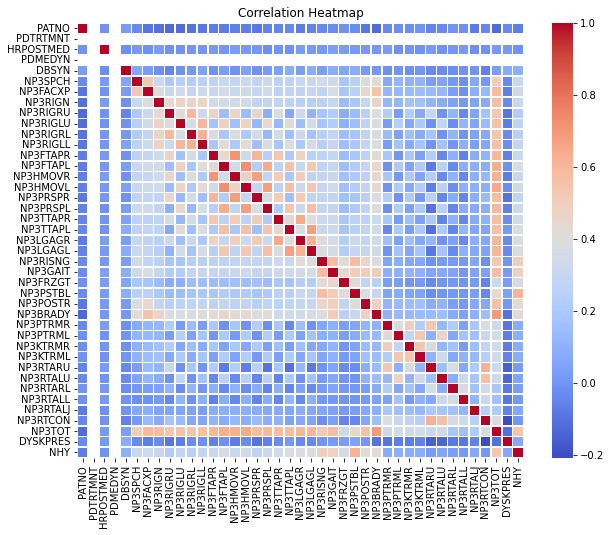

<Figure size 1440x1440 with 0 Axes>

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.figure(figsize=(20,20))
plt.show()

# **Finding Outliers**


<AxesSubplot:>

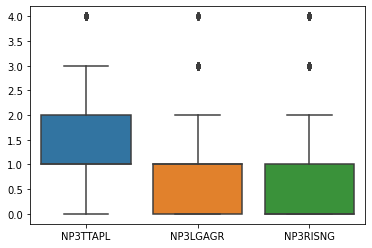

In [19]:
sns.boxplot(data= df.loc[:,["NP3TTAPL","NP3LGAGR","NP3RISNG"]])

<AxesSubplot:>

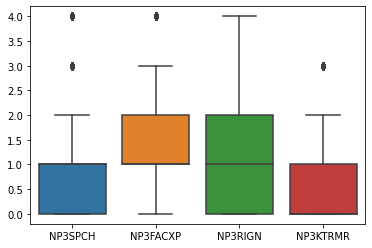

In [20]:
sns.boxplot(data= df.loc[:,["NP3SPCH","NP3FACXP","NP3RIGN","NP3KTRMR"]])

# **Handling Outliers**

In [21]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Calculate z-scores for each numerical column
z_scores = stats.zscore(df[numerical_columns])

# Define a threshold for extreme z-scores (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask for extreme z-scores
extreme_z_score_mask = np.abs(z_scores) > threshold

# Remove rows with extreme z-scores
dataset = df[~extreme_z_score_mask.any(axis=1)]
print(dataset) # Now, 'df_no_extreme_z_scores' contains the DataFrame with rows having extreme z-scores removed


        PATNO    PAG_NAME  PDTRTMNT PDSTATE  HRPOSTMED  PDMEDYN  DBSYN  \
3      101018  NUPDRDOSE3       1.0      ON     3.0833      1.0    0.0   
9        3282    NUPDRS3A       1.0      ON     1.5167      1.0    0.0   
10       3960  NUPDRDOSE3       1.0      ON     1.3167      1.0    0.0   
14       3482     NUPDRS3       1.0     OFF    16.5833      1.0    0.0   
16       3900     NUPDRS3       1.0      ON     1.7500      1.0    0.0   
...       ...         ...       ...     ...        ...      ...    ...   
11940    3325    NUPDR3ON       1.0      ON     0.5333      1.0    0.0   
11948    3822  NUPDRDOSE3       1.0      ON     1.0000      1.0    0.0   
11949    3365     NUPDRS3       1.0      ON     1.1667      1.0    0.0   
11951   42411    NUPDRS3A       1.0      ON     0.8333      1.0    0.0   
11959    3203     NUPDRS3       1.0      ON     1.7500      1.0    0.0   

       NP3SPCH  NP3FACXP  NP3RIGN  ...  NP3KTRML  NP3RTARU  NP3RTALU  \
3          0.0       1.0      0.0  ... 

C:\Users\utkar\anaconda3\envs\tfgpu\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


<AxesSubplot:>

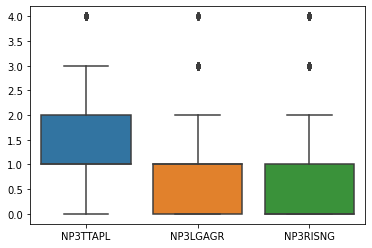

In [22]:
sns.boxplot(data= df.loc[:,["NP3TTAPL","NP3LGAGR","NP3RISNG"]])

<AxesSubplot:>

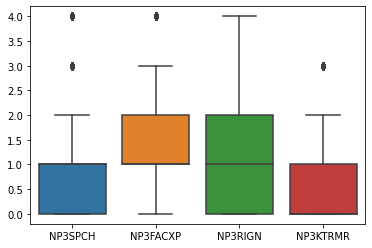

In [23]:
sns.boxplot(data= df.loc[:,["NP3SPCH","NP3FACXP","NP3RIGN","NP3KTRMR"]])

<AxesSubplot:>

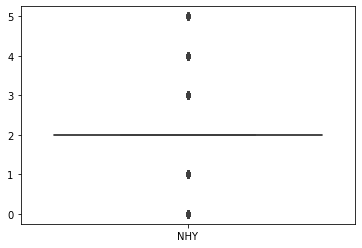

In [24]:
sns.boxplot(data= df.loc[:,["NHY"]])

# **Find Unique value**

In [25]:
i = 0
for col in df:
    column_names = df.keys().values.tolist()
    print(column_names[i],":",df[col].nunique())
    i=i+1

PATNO : 911
PAG_NAME : 5
PDTRTMNT : 1
PDSTATE : 2
HRPOSTMED : 948
PDMEDYN : 1
DBSYN : 2
NP3SPCH : 5
NP3FACXP : 5
NP3RIGN : 5
NP3RIGRU : 5
NP3RIGLU : 5
NP3RIGRL : 5
NP3RIGLL : 5
NP3FTAPR : 5
NP3FTAPL : 5
NP3HMOVR : 5
NP3HMOVL : 5
NP3PRSPR : 5
NP3PRSPL : 5
NP3TTAPR : 5
NP3TTAPL : 5
NP3LGAGR : 5
NP3LGAGL : 5
NP3RISNG : 5
NP3GAIT : 5
NP3FRZGT : 5
NP3PSTBL : 5
NP3POSTR : 5
NP3BRADY : 5
NP3PTRMR : 5
NP3PTRML : 5
NP3KTRMR : 4
NP3KTRML : 4
NP3RTARU : 5
NP3RTALU : 5
NP3RTARL : 5
NP3RTALL : 5
NP3RTALJ : 4
NP3RTCON : 5
NP3TOT : 88
DYSKPRES : 2
NHY : 6


# **Encoding Categorical Data**

In [26]:

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Specify the column names you want to label encode
columns_to_encode = ['PAG_NAME', 'PDSTATE']


# Apply label encoding to each specified column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the DataFrame with label-encoded columns
print(df)


        PATNO  PAG_NAME  PDTRTMNT  PDSTATE  HRPOSTMED  PDMEDYN  DBSYN  \
0       57869         3       1.0        0    14.5000      1.0    0.0   
3      101018         2       1.0        1     3.0833      1.0    0.0   
9        3282         4       1.0        1     1.5167      1.0    0.0   
10       3960         2       1.0        1     1.3167      1.0    0.0   
14       3482         3       1.0        0    16.5833      1.0    0.0   
...       ...       ...       ...      ...        ...      ...    ...   
11948    3822         2       1.0        1     1.0000      1.0    0.0   
11949    3365         3       1.0        1     1.1667      1.0    0.0   
11951   42411         4       1.0        1     0.8333      1.0    0.0   
11956  143192         2       1.0        1     0.4667      1.0    0.0   
11959    3203         3       1.0        1     1.7500      1.0    0.0   

       NP3SPCH  NP3FACXP  NP3RIGN  ...  NP3KTRML  NP3RTARU  NP3RTALU  \
0          1.0       2.0      3.0  ...       0.0   

In [27]:
df['PDSTATE']

0        0
3        1
9        1
10       1
14       0
        ..
11948    1
11949    1
11951    1
11956    1
11959    1
Name: PDSTATE, Length: 9009, dtype: int32

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9009 entries, 0 to 11959
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PATNO      9009 non-null   int64  
 1   PAG_NAME   9009 non-null   int32  
 2   PDTRTMNT   9009 non-null   float64
 3   PDSTATE    9009 non-null   int32  
 4   HRPOSTMED  9009 non-null   float64
 5   PDMEDYN    9009 non-null   float64
 6   DBSYN      9009 non-null   float64
 7   NP3SPCH    9009 non-null   float64
 8   NP3FACXP   9009 non-null   float64
 9   NP3RIGN    9009 non-null   float64
 10  NP3RIGRU   9009 non-null   float64
 11  NP3RIGLU   9009 non-null   float64
 12  NP3RIGRL   9009 non-null   float64
 13  NP3RIGLL   9009 non-null   float64
 14  NP3FTAPR   9009 non-null   float64
 15  NP3FTAPL   9009 non-null   float64
 16  NP3HMOVR   9009 non-null   float64
 17  NP3HMOVL   9009 non-null   float64
 18  NP3PRSPR   9009 non-null   float64
 19  NP3PRSPL   9009 non-null   float64
 20  NP3TTAP

# **Separating features and label**

In [29]:
# Extract features and labels
features = df.drop(columns=['NHY'])  # Features
labels = df['NHY']
# Convert labels to integers
labels = labels.astype(int)
labels

0        2
3        2
9        2
10       2
14       1
        ..
11948    1
11949    2
11951    3
11956    2
11959    1
Name: NHY, Length: 9009, dtype: int32

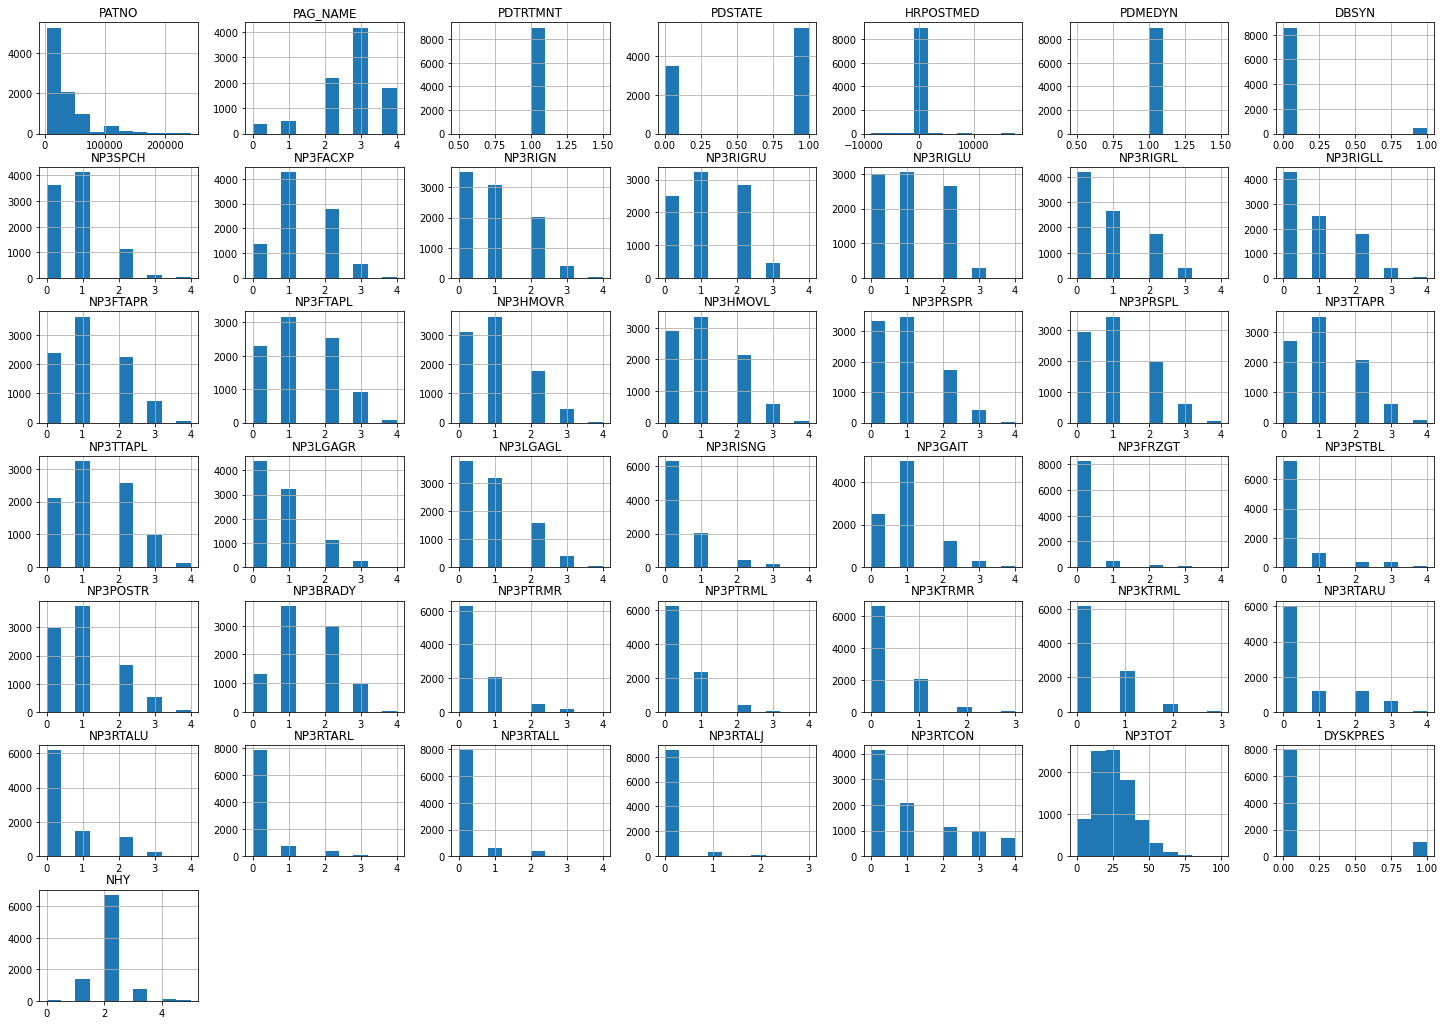

In [30]:
df.hist(figsize=(25,18))
plt.show()


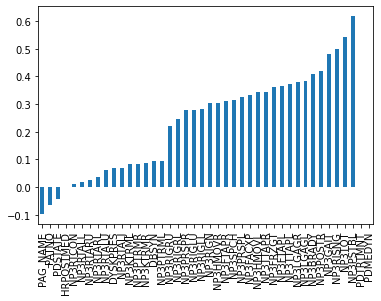

In [31]:
df.corr()['NHY'][:-1].sort_values().plot(kind='bar')
plt.show()


In [32]:
df.to_csv("newdataset.csv")

# **Spliting into Training and Testing Data**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [34]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7207, 42) (1802, 42)
(7207,) (1802,)


In [35]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')


# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

#model evaluation on training data
training_prediction = svm_classifier.predict(X_train)

training_accuracy = accuracy_score(y_train, training_prediction)
print('THE ACCURACCY ON TRAINING DATA IS :', training_accuracy)

#model evaluation on testing data
testing_prediction =svm_classifier.predict(X_test)

testing_accuracy = accuracy_score(y_test, testing_prediction)
print('THE ACCURACCY ON TESTING DATA IS :', testing_accuracy)